In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Dataset/flight_time.csv')

In [2]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [10]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
41.08       1
35.67       1
47.08       1
44.50       1
41.50       1
Name: count, Length: 476, dtype: int64

In [11]:
#shortest Flight
df['duration'].min()

np.float64(0.83)

In [12]:
#longest Flight
df['duration'].max()

np.float64(49.83)

In [13]:
df['duration'].median()

np.float64(11.25)

### Preprocessing

In [14]:
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('flight', axis = 1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)


In [15]:
df.stops = pd.factorize(df.stops)[0]

In [16]:
df = df.join(pd.get_dummies(df.airline, prefix='Airline*')).drop('airline', axis = 1)
df = df.join(pd.get_dummies(df.source_city, prefix='Source*')).drop('source_city', axis = 1)
df = df.join(pd.get_dummies(df.destination_city, prefix='Dest*')).drop('destination_city', axis = 1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='Arrive*')).drop('arrival_time', axis = 1)
df = df.join(pd.get_dummies(df.departure_time, prefix='Depart*')).drop('departure_time', axis = 1)


In [17]:
df

,stops,class,duration,days_left,price,Airline*_AirAsia,Airline*_Air_India,Airline*_GO_FIRST,Airline*_Indigo,Airline*_SpiceJet,...,Arrive*_Evening,Arrive*_Late_Night,Arrive*_Morning,Arrive*_Night,Depart*_Afternoon,Depart*_Early_Morning,Depart*_Evening,Depart*_Late_Night,Depart*_Morning,Depart*_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


### Training Regression Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis =1), df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [20]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
reg.score(X_test, y_test)

0.9855737906638188

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9855737906638188
MAE: 1061.437469690233
MSE: 7418043.333924984
RMSE 2723.6085133375877


Text(0.5, 1.0, 'Prediction VS Actual Price')

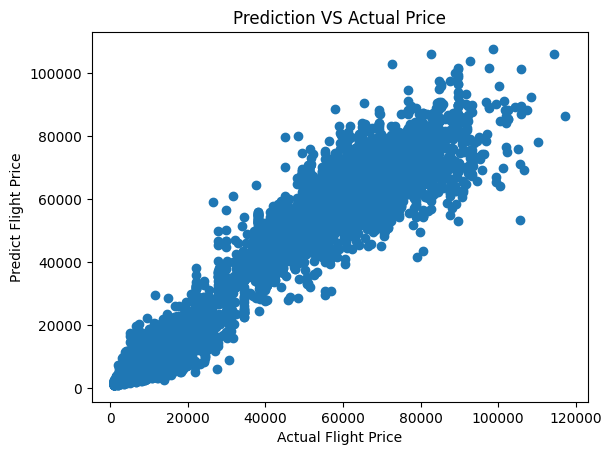

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predict Flight Price')
plt.title('Prediction VS Actual Price')

In [ ]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [ ]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances


[('class', np.float64(0.8802559764014651)),
 ('duration', np.float64(0.05707519541024437)),
 ('days_left', np.float64(0.018618657187316895)),
 ('Airline*_Air_India', np.float64(0.005630318719561815)),
 ('Airline*_Vistara', np.float64(0.004430936252364461)),
 ('Source*_Delhi', np.float64(0.0036772521726805016)),
 ('Dest*_Delhi', np.float64(0.003227829729764218)),
 ('Source*_Mumbai', np.float64(0.0021887814980396238)),
 ('Dest*_Mumbai', np.float64(0.0019110319368622344)),
 ('stops', np.float64(0.0018605368445113247)),
 ('Dest*_Kolkata', np.float64(0.0018456415697568954)),
 ('Source*_Kolkata', np.float64(0.0017462860147271322)),
 ('Arrive*_Evening', np.float64(0.0015370344826388762)),
 ('Dest*_Hyderabad', np.float64(0.001515139883273462)),
 ('Dest*_Bangalore', np.float64(0.0013486338757834745)),
 ('Source*_Hyderabad', np.float64(0.0012368470894744117)),
 ('Arrive*_Night', np.float64(0.0011295512511930834)),
 ('Source*_Bangalore', np.float64(0.0011280778432168448)),
 ('Depart*_Evening', np

In [ ]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

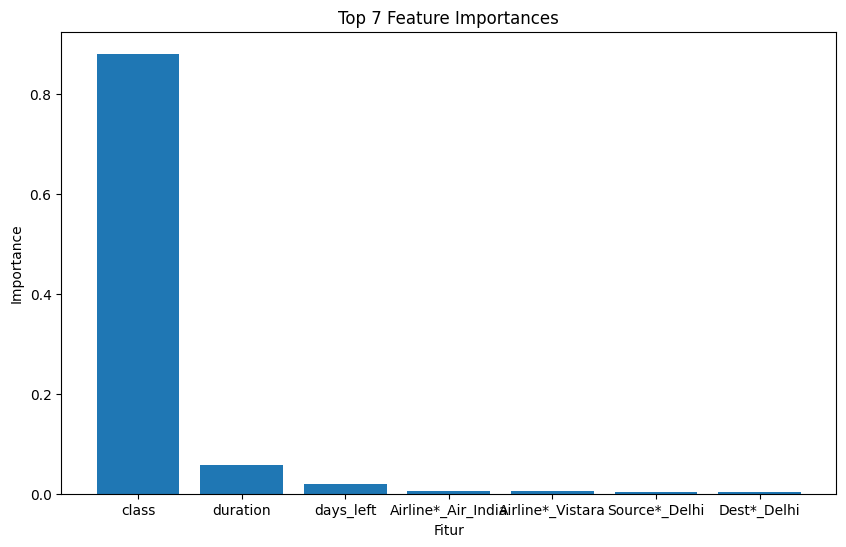

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(
    [x[0] for x in sorted_importances[:7]],
    [x[1] for x in sorted_importances[:7]] 
)
plt.xlabel("Fitur")
plt.ylabel("Importance")
plt.title("Top 7 Feature Importances")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators'      : [100,200,300],
    'max_depth'         : [None,10,20,30],
    'min_samples_split' : [2,3,5],
    'min_samples_leaf'  : [1,2,4],
    'max_features'      : ['auto','sqrt']
}

grid_search = GridSearchCV(reg, param_grid,cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=reg, 
    param_distributions=param_dist, 
    n_iter=2, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=2 ,
    random_state=10, 
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_



Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
best_regressor.score(X_test, y_test)#!/usr/bin/env python3

0.927451513632878

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.927451513632878
MAE: 4296.488810768041
MSE: 37262394.23957899
RMSE 6104.29309908846


Text(0.5, 1.0, 'Prediction VS Actual Price')

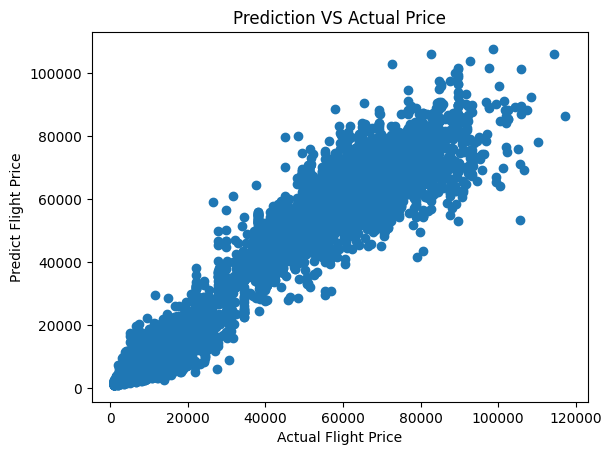

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predict Flight Price')
plt.title('Prediction VS Actual Price')

In [ ]:
#best_regressor.predict()